In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the Dataset

In [3]:
dataset=pd.read_csv('HousingData.csv')
dataset=dataset.rename(columns={'MEDV':'Target'})
dataset.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [4]:
#Information about the Data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Preparing the Dataset

In [5]:
#Summarize the stats of the Data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#Check the missing values
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Target      0
dtype: int64

In [7]:
#Remove Null values
dataset=dataset.dropna(axis=0)

Exploratory Data Analysis

In [8]:
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


In [9]:
# Note : Do scatter plots for all the posssible combinations of independent and dependent features and check where there is linear relationship between them.

Data Preperation

In [10]:
#Independent and dependent Features
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [11]:
#Train and test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
#Standardize the Dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [35]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

Model Training

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regression=LinearRegression()
regression.fit(X_train,y_train)
print(regression.coef_)
print(regression.intercept_)

[-1.16422484  1.06108499  0.39032387  0.29209079 -1.99660097  2.919107
 -0.56678274 -2.98589329  2.41887408 -2.87948075 -1.92242361  0.87551786
 -2.71551439]
21.872363636363634


In [16]:

#on which parameter the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [17]:
X_test

array([[-0.42814192,  0.67765488,  0.56050236, ..., -0.11465158,
         0.39188699, -0.8817145 ],
       [-0.42043653,  1.97569802, -1.30355609, ..., -0.06932421,
         0.33306903, -0.65344606],
       [-0.34935613, -0.45813288, -0.15719505, ..., -0.02399684,
         0.39041654,  0.06025403],
       ...,
       [-0.40118629, -0.45813288, -0.50906226, ...,  0.5199316 ,
         0.40026855, -0.78636186],
       [-0.41721963,  1.3672403 , -1.05920385, ..., -1.4744727 ,
         0.11764827, -1.04208031],
       [-0.22281951, -0.45813288,  1.51696681, ...,  1.24516954,
         0.40026855, -0.00764861]])

In [18]:
#Prediction with test data
reg_pred=regression.predict(X_test)

Assumptions

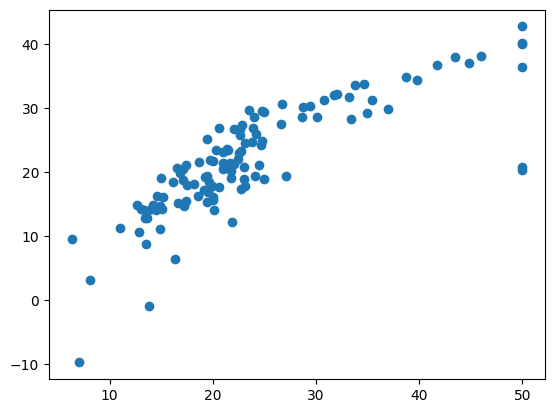

In [19]:
#plot a Scatter plot for the predict
plt.scatter(y_test,reg_pred)

In [20]:
# residuals
residuals=y_test-reg_pred
residuals

93    -4.474063
352    2.220033
319   -0.527113
65    -6.280343
499   -0.549002
         ...   
358    5.228092
457    4.648591
321   -1.525013
190    7.133616
131    1.128263
Name: Target, Length: 119, dtype: float64

c:\Users\ajai\venvs\ml\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


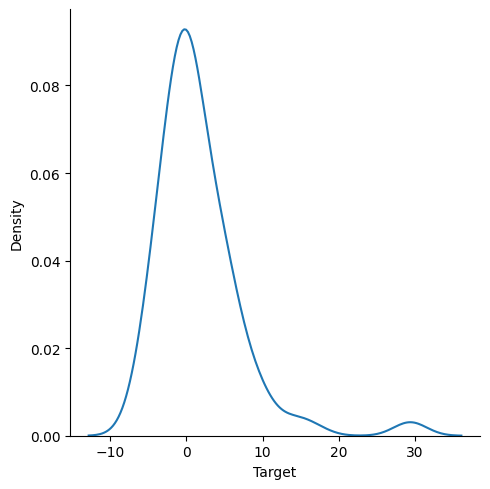

In [21]:
#Plot this residuals
sns.displot(residuals,kind='kde')

In [22]:
#From the above plot we can get to know that the data doesnt follow normal distribution... So try to remove outliers

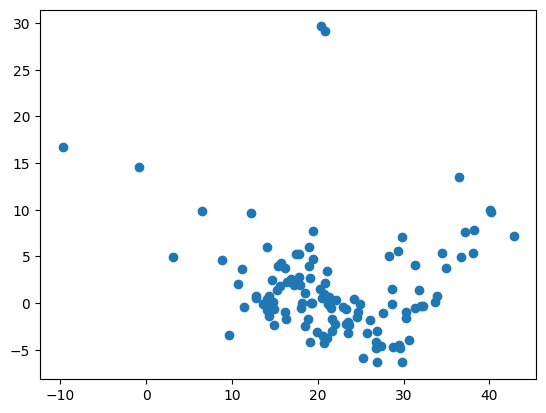

In [23]:
#Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.6492025784669173
33.91693453444478
5.823824734179831


R square and adjusted R square

In [25]:
#R square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6364248546526883


In [26]:
# Adjusted r^2=1-[(1-r^2)(n-1)/(n-k-1)]
# r^2------ R square value
# n--------length of the dataset
# k--------Number of predictors

In [27]:
# Adjusted R square
adjusted_r_square=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r_square

0.5914107890382592

 New Data Prediction

In [28]:
#Load a row from the dataset for prediction
sample=dataset.iloc[:1,:-1]

In [29]:
#Transformation of new data
scaled=scaler.transform(sample)

In [30]:
predicted_value=regression.predict(scaler.transform(scaled))
predicted_value

c:\Users\ajai\venvs\ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([38.35952718])

Pickling the Model File for Deployment

In [31]:
import pickle

In [32]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [33]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [34]:
# Prediction 
pickled_model.predict(scaler.transform(dataset.iloc[:1,:-1]))

array([28.71482167])